Import Libraries

In [1]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# specific imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

Import Dataset

In [2]:
# Assign data to variable
dataset = pd.read_csv('combinedData.csv')

# Take a small look at the dataframe produced
print(dataset.head())

   January 2008  February 2008  March 2008  April 2008  May 2008  June 2008  \
0         86.10          86.30        86.4        86.3     86.20       86.3   
1          6.81           6.72         6.6         6.4      6.21        6.2   
2        119.20         119.60       120.1       121.2    121.60      122.3   

   July 2008  August 2008  September 2008  October 2008  ...  March 2023  \
0      86.30        86.30           86.30         85.60  ...      128.40   
1       6.37         6.25            6.16          6.46  ...        5.81   
2     123.30       123.80          123.10        123.20  ...      168.90   

   April 2023  May 2023  June 2023  July 2023  August 2023  September 2023  \
0      128.20    128.30     128.30     128.20       128.10          127.80   
1        5.75      5.74       5.85       5.99         6.17            6.27   
2      169.90    170.60     171.40     172.60       174.00          174.80   

   October 2023  November 2023  December 2023  
0        127.60  

Preprocess Data (normalize it!)

In [3]:
# Convert the date strings into datetime objects
converted_dates = []

for date in dataset.columns:
  datetime_object = datetime.strptime(date, '%B %Y')
  converted_dates.append(datetime_object.timestamp())

dates_array = np.array(converted_dates)

Encode Catagorical data

In [4]:
# Initialize the encoder to work with
label_encoder = LabelEncoder()

print(dataset.iloc[0])

# Fit the data needed to the encoder for later use
label_encoder.fit(dataset.iloc[0])

dataset.iloc[1] = label_encoder.transform(dataset.iloc[0])

January 2008       86.1
February 2008      86.3
March 2008         86.4
April 2008         86.3
May 2008           86.2
                  ...  
August 2023       128.1
September 2023    127.8
October 2023      127.6
November 2023     127.2
December 2023     127.2
Name: 0, Length: 192, dtype: float64


Split data into X and y sets

In [5]:
# define X and y variables
X = dates_array
y = dataset.iloc[0].values

# varify the split data
print(f"X dataset example: {X[0]}")
print(f"y dataset example: {y[0]}")

X dataset example: 1199145600.0
y dataset example: 86.1


Break data into Training and Test sets

In [6]:
# Split into 4 specific variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

Instatiate the model

In [7]:
# plant the seeds to grow a forest
forest_model = RandomForestRegressor(n_estimators=50, random_state=0)

Train the model

In [8]:
# call your model and passin the training datasets
forest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

Make the predictions you want it to output

In [9]:
# pass in X_test to predict a y value
y_predict = forest_model.predict(X_test)

print(y_predict)

[ 88.942 102.56   94.024 102.696 100.88  129.616  83.286  82.856  82.802
  86.08   94.334 100.376  92.308  92.262 105.916  86.564 103.346  92.986
 100.318  92.956 128.656 107.882 103.146  97.236  92.596 102.916  84.862
 111.946  91.752 102.494 102.512 122.428  83.278  95.456 126.344  86.272
 102.796 102.624 119.978]


Check the model

In [10]:
# pass in your y test data and check it against your y predicted data
mse = mean_squared_error(y_test, y_predict)

# share with the world!
print(f"mean Squared Error: {mse}")

mean Squared Error: 0.30800769230769187


Make a pretty graph!

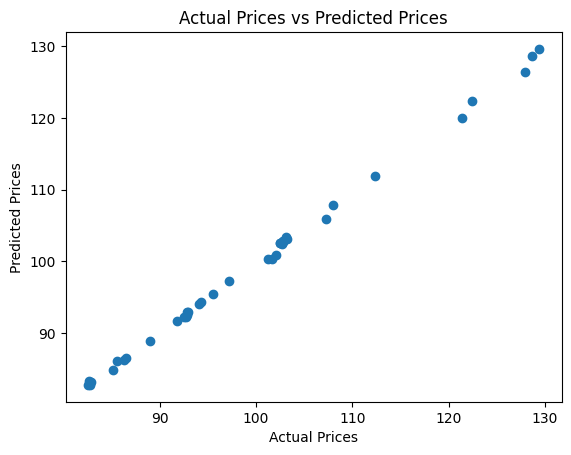

In [11]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()